## Text_Analysis

**Part 1: Build a classification model using text data**

In part one of the homework, you will solve a text classification task.

You can download the following clickbait data-sets from the aimodelshare library:


In [1]:
pip install aimodelshare

In [2]:
import aimodelshare as ai
X_train, X_test, y_train_labels, y_test_labels, example_data, lstm_model, lstm_model2 = ai.import_quickstart_data("clickbait")


Data downloaded successfully.

Preparing downloaded files for use...

Success! Your Quick Start materials have been downloaded. 
You are now ready to run the tutorial.


The data consists of headlines that signify clickbait or not.  Training and test data are stored in the following objects: X_train, X_test, y_train_labels, y_test_labels.  The remaining objects can be ignored.

In a real application this might allow us to find out what is hard news information (or perhaps to choose among headlines that are more likely to be clicked).

Use cross-validation to evaluate the results. Use a robust metric for classification  (AUC or F1-Score for example), and inspect all models by visualizing the coefficients. (See helper function in our in class notebook for text models.)

To complete part one of the homework do the following:

**Import the text data, vectorize the clickbait headline column into an X matrix.  Then run logistic regression at least three times and select a single best model.  Note that you should create three logistic regression models with different tokenization approaches.  You should not change your modeling approach, you should simply experiment with different tokenizers. Be sure to explain your choices and evaluate your models using cross validation and using test set data.**

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
y_train = y_train_labels.apply(lambda x: 1 if x == 'clickbait' else 0)
y_test = y_test_labels.apply(lambda x: 1 if x == 'clickbait' else 0)

In [5]:
#No tokenizer - Original
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer()
X_trans = vect.fit_transform(X_train)
X_test_trans = vect.transform(X_test)

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics
import numpy as np

logistic = LogisticRegression().fit(X_trans, y_train)
cv_log = cross_val_score(logistic, X_test_trans, y_test, cv=5, scoring='f1')
f1_score0 = f1_score(logistic.predict(X_test_trans), y_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, logistic.predict(X_test_trans))
AUC0 = metrics.auc(fpr, tpr)

print("Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_log)))
print("The test f1 score:{:.2f}".format(f1_score0))
print("The test AUC score:{:.2f}".format(AUC0))

Mean cross-validation accuracy: 0.95
The test f1 score:0.97
The test AUC score:0.97


In [7]:
def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")


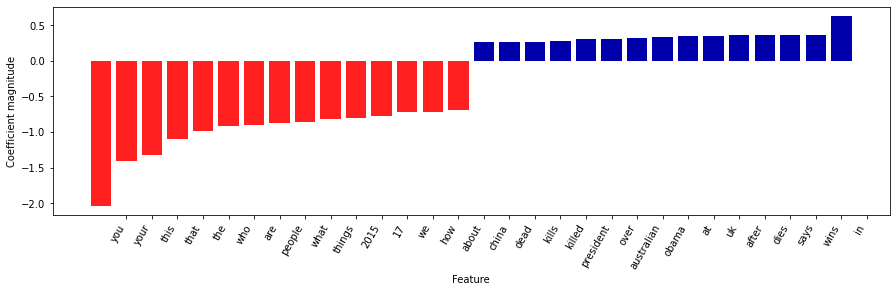

In [8]:
import matplotlib.pyplot as plt
coefs = LogisticRegression(C=0.01).fit(X_trans,y_train_labels).coef_
feature_names = vect.fit(X_train).get_feature_names()
visualize_coefficients(coefs, feature_names, n_top_features=15)

In [9]:
#Model 1 - Tokenizer1 - LemmaTokenizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

lemma_vect = CountVectorizer(tokenizer=LemmaTokenizer())
X_trans1 = lemma_vect.fit_transform(X_train)
X_test_trans1 = lemma_vect.transform(X_test)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics
import numpy as np

logistic1 = LogisticRegression().fit(X_trans1, y_train)
cv_log1 = cross_val_score(logistic1, X_test_trans1, y_test, cv=5, scoring='f1')
f1_score1 = f1_score(logistic1.predict(X_test_trans1), y_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, logistic1.predict(X_test_trans1))
AUC1 = metrics.auc(fpr, tpr)

print("Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_log1)))
print("The test f1 score:{:.2f}".format(f1_score1))
print("The test AUC score:{:.2f}".format(AUC1))

Mean cross-validation accuracy: 0.96
The test f1 score:0.98
The test AUC score:0.98


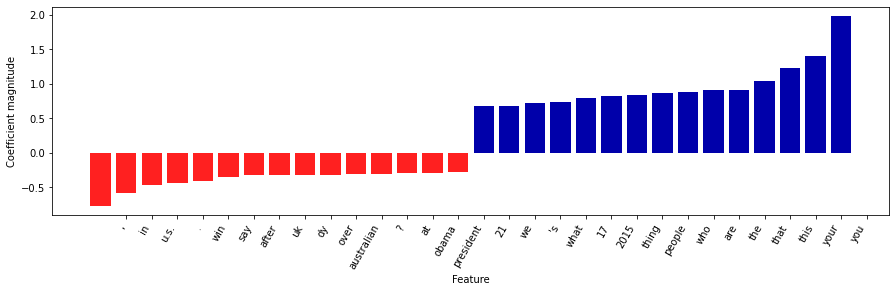

In [11]:
import matplotlib.pyplot as plt
coefs1 = LogisticRegression(C=0.01).fit(X_trans1,y_train).coef_
feature_names1 = lemma_vect.fit(X_train).get_feature_names()
visualize_coefficients(coefs1, feature_names1, n_top_features=15)

In [12]:
#Model 2 - Tokenizer2 - bags of words
from sklearn.feature_extraction.text import CountVectorizer 

vect1 = CountVectorizer(ngram_range=(1,2), min_df=4, stop_words='english')
X_trans2 = vect1.fit_transform(X_train)
X_test_trans2 = vect1.transform(X_test)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics
import numpy as np

logistic2 = LogisticRegression().fit(X_trans2, y_train)
cv_log2 = cross_val_score(logistic2, X_test_trans2, y_test, cv=5, scoring='f1')
f1_score2 = f1_score(logistic2.predict(X_test_trans2), y_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, logistic2.predict(X_test_trans2))
AUC2 = metrics.auc(fpr, tpr)

print("Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_log2)))
print("The test f1 score:{:.2f}".format(f1_score2))
print("The test AUC score:{:.2f}".format(AUC2))

Mean cross-validation accuracy: 0.92
The test f1 score:0.95
The test AUC score:0.95


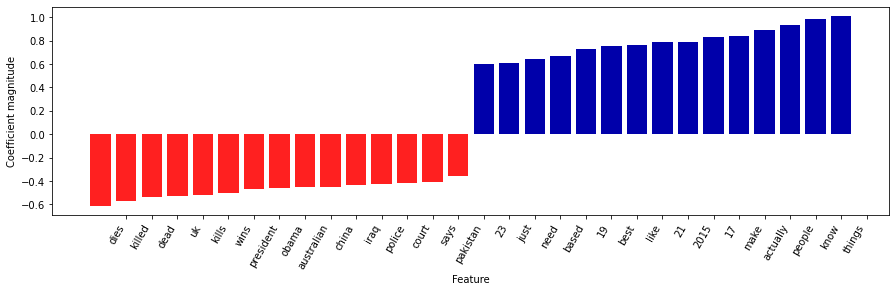

In [14]:
import matplotlib.pyplot as plt
coefs2 = LogisticRegression(C=0.01).fit(X_trans2,y_train).coef_
feature_names2 = vect1.fit(X_train).get_feature_names()
visualize_coefficients(coefs2, feature_names2, n_top_features=15)

In [15]:
#Model 3 - Tokenizer3 - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

tfidf = TfidfVectorizer()
X_trans3 = tfidf.fit_transform(X_train)
X_test_trans3 = tfidf.transform(X_test)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics
import numpy as np

logistic3 = LogisticRegression().fit(X_trans3, y_train)
cv_log3 = cross_val_score(logistic3, X_test_trans3, y_test, cv=5, scoring='f1')
f1_score3 = f1_score(logistic3.predict(X_test_trans3), y_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, logistic3.predict(X_test_trans3))
AUC3 = metrics.auc(fpr, tpr)

print("Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_log3)))
print("The test f1 score:{:.2f}".format(f1_score3))
print("The test AUC score:{:.2f}".format(AUC3))

Mean cross-validation accuracy: 0.94
The test f1 score:0.97
The test AUC score:0.97


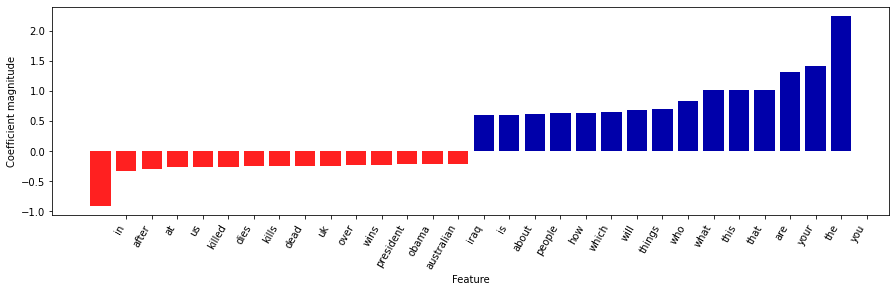

In [17]:
import matplotlib.pyplot as plt
coefs3 = LogisticRegression(C=0.01).fit(X_trans3, y_train).coef_
feature_names3 = tfidf.fit(X_train).get_feature_names()
visualize_coefficients(coefs3, feature_names3, n_top_features=15)

**Model Evaluation and conclusions:**  
- As for the original model: The mean cross validation score is 0.95, the f1 score is 0.97 and the AUC score is 0.97.
- As for the LemmaTokenizer: The mean cross validation score is 0.96, the f1 score is 0.98 and the AUC score is 0.98.
- As for the bags of words: The mean cross validation score is 0.92, the f1 score is 0.95 and the AUC score is 0.95.
- As for the Tf-idf: The mean cross validation score is 0.94, the f1 score is 0.97 and the AUC score is 0.97.

**Above all, I would choose LemmaTokenizer as the tokenization method.**

**Part 2: Build a predictive neural network using Keras**  
To complete part two of the homework do the following:

Run a multilayer perceptron (feed forward neural network) with two hidden layers on the iris dataset using the keras Sequential interface.

Data can be imported via the following link:

http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv

Include code for selecting the number of hidden units using GridSearchCV and evaluation on a test-set.  

Describe the differences in the predictive accuracy of models with different numbers of hidden units.   

Describe the predictive strength of your best model.  Be sure to explain your choice and evaluate this model using the test set.

In [18]:
#load the dataset
import pandas as pd

data = pd.read_csv("iris.csv")
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [19]:
#train_test_split data
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

iris = data.iloc[:,1:]
X = iris.iloc[:, 0 : 4]
y = LabelEncoder().fit_transform(iris['Species'])
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X, y, random_state = 42)

In [20]:
#Run a multilayer perceptron with two hidden layers
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

def create_model(hiddennodes):
    
    model = Sequential()
    model.add(Dense(hiddennodes, input_dim = 4, activation='relu'))
    model.add(Dense(hiddennodes, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=100, verbose=0) 
                                                                      

param_grid = dict(hiddennodes=[5,10,20,30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_iris_train, y_iris_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.945850 using {'hiddennodes': 30}


In [21]:
#Evaluate on testing set
from sklearn.metrics import accuracy_score

model1 = KerasClassifier(build_fn= lambda: create_model(8), epochs=100, verbose=0)
model1.fit(X_iris_train,y_iris_train)
print(accuracy_score(y_iris_test, model1.predict(X_iris_test)))

model2 = KerasClassifier(build_fn= lambda: create_model(12), epochs=100, verbose=0)
model2.fit(X_iris_train,y_iris_train)
print(accuracy_score(y_iris_test, model2.predict(X_iris_test)))

model3 = KerasClassifier(build_fn= lambda: create_model(16), epochs=100, verbose=0)
model3.fit(X_iris_train,y_iris_train)
print(accuracy_score(y_iris_test, model3.predict(X_iris_test)))

model4 = KerasClassifier(build_fn= lambda: create_model(20), epochs=100, verbose=0)
model4.fit(X_iris_train,y_iris_train)
print(accuracy_score(y_iris_test, model4.predict(X_iris_test)))

0.9736842105263158
0.8947368421052632
0.868421052631579
0.9736842105263158


**Model evaluation**
- As for the training data set, we could see from the result, when the hidden units equal to 30, the score would be the highest: 0.946.
- As for the testing dataset, when the hidden units equal to 5, the accuracy is around 0.974; when the hidden units equal to 10, the accuracy is around 0.895; when the hidden units equal to 20, the accuracy is around 0.868; when the hidden units equal to 30, the accuracy is around 0.974.
- I would choose 30 as my hidden units for this model. Because it gets the highest score in the training set as well as in the testing set.